### Environment settings

In [1]:
"""
    Importing needed libs
"""

'\n    Importing needed libs\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading

In [3]:
df = pd.read_csv('../outputs/experiment_results.csv')
df['community_detector'] = df['community_detector'].replace('Not-Applicable', 'Default')
display(df)

,dataset,community_detector,algorithm_rec,test_size,split_id,rmse,mse,mae
0,synthetic,Default,NormalPredictor,0.25,1,1.608937,2.588678,1.295170
1,synthetic,Default,SVD,0.25,1,1.144648,1.310218,0.927866
2,synthetic,Default,k-NN,0.25,1,1.104047,1.218920,0.897083
3,synthetic,Default,NMF,0.25,1,1.083401,1.173757,0.881770
4,synthetic,Default,Co-Clustering,0.25,1,1.068388,1.141454,0.875873
...,...,...,...,...,...,...,...,...
535,real,Paris,SVD,0.01,5,0.922227,0.850503,0.716341
536,real,Paris,k-NN,0.01,5,0.982431,0.965171,0.762942
537,real,Paris,NMF,0.01,5,0.956959,0.915771,0.744346
538,real,Paris,Co-Clustering,0.01,5,0.977124,0.954772,0.748151


In [101]:
models = list(
    set(
        df['algorithm_rec']
        )
    )
models.sort()

methods = list(
    set(
        df['community_detector']
    )
)
methods.sort()
colors = ['#00CED1', '#FFB6C1', '#FFD700']#['#E6E6FA', '#FFC0CB', '#FFA07A']
bar_width = 0.2
index = np.arange(len(models))

### Evaluation

In [102]:
data = df.copy()
errors = df.copy()
data = data.groupby(['dataset', 'community_detector', 'algorithm_rec', 'test_size'])['rmse'].mean().reset_index()
data = data.groupby(['dataset', 'community_detector', 'algorithm_rec'])['rmse'].mean().reset_index()
errors = errors.groupby(['dataset', 'community_detector', 'algorithm_rec'])['rmse'].std().reset_index()

In [103]:
display(data)

,dataset,community_detector,algorithm_rec,rmse
0,real,Default,Co-Clustering,0.951984
1,real,Default,NMF,0.951615
2,real,Default,NormalPredictor,1.512899
3,real,Default,SVD,0.922861
4,real,Default,SlopeOne,0.935830
5,real,Default,k-NN,0.967516
6,real,Louvain,Co-Clustering,0.986582
7,real,Louvain,NMF,0.989259
8,real,Louvain,NormalPredictor,1.494012
9,real,Louvain,SVD,0.944029


In [104]:
display(errors)

,dataset,community_detector,algorithm_rec,rmse
0,real,Default,Co-Clustering,0.021232
1,real,Default,NMF,0.016197
2,real,Default,NormalPredictor,0.014264
3,real,Default,SVD,0.017606
4,real,Default,SlopeOne,0.014994
5,real,Default,k-NN,0.016694
6,real,Louvain,Co-Clustering,0.022295
7,real,Louvain,NMF,0.028640
8,real,Louvain,NormalPredictor,0.018186
9,real,Louvain,SVD,0.018503


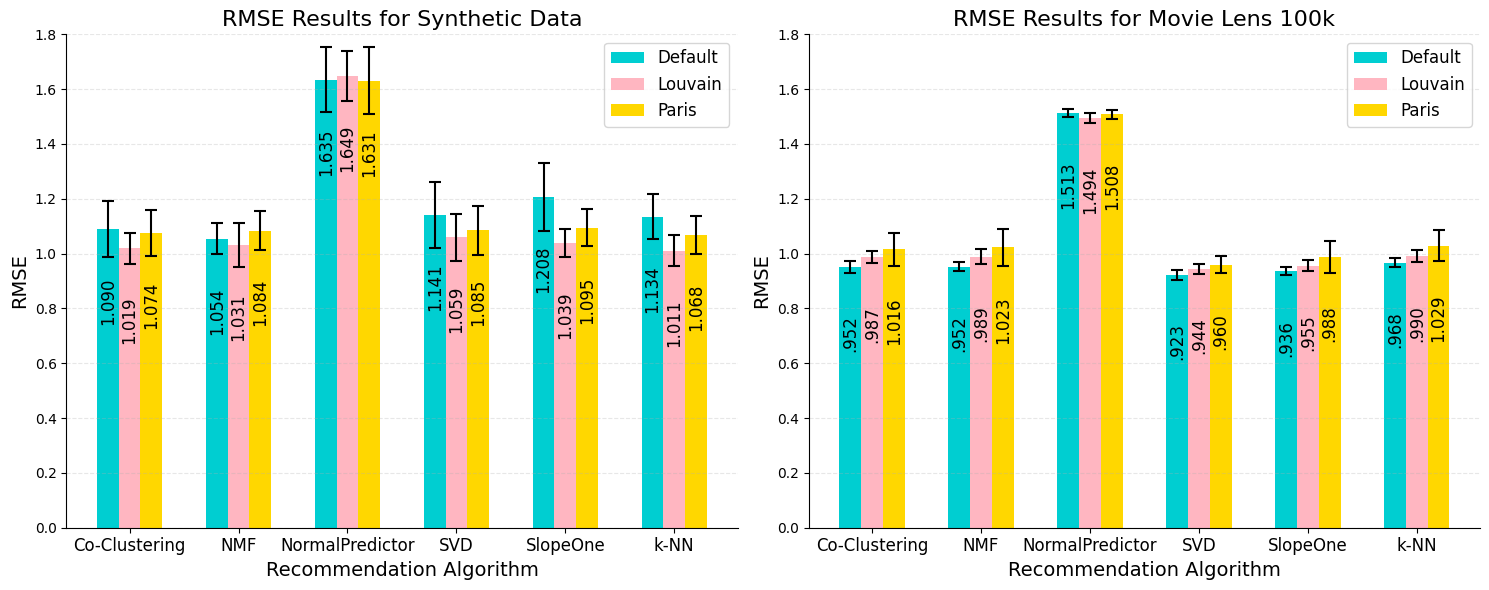

In [109]:
syntpd = data[data['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'rmse']]
syntpd = syntpd.sort_values(by=['algorithm_rec', 'community_detector'])
rmse_synt = syntpd['rmse'].values
rmse_synt = rmse_synt.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'rmse']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_synt = errorpd['rmse'].values
errors_synt = errors_synt.reshape(-1, 3)

realpd = data[data['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'rmse']]
realpd = realpd.sort_values(by=['algorithm_rec', 'community_detector'])
rmse_real = realpd['rmse'].values
rmse_real = rmse_real.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'rmse']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_real = errorpd['rmse'].values
errors_real = errors_real.reshape(-1, 3)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bars and adding labels for the synthetic dataset
for i, method in enumerate(methods):
    axes[0].bar(index + (i * bar_width), rmse_synt[:, i], yerr=errors_synt[:, i], width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(rmse_synt[:, i]):
        formatted_value = format(value, '.3f').lstrip('0')
        axes[0].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                         xytext=(0, -35), textcoords='offset points', ha='center', va='top',
                         fontsize=12, color='black', rotation='vertical')#, fontweight='bold')

# Additional plot settings for the synthetic dataset
axes[0].set_xlabel('Recommendation Algorithm', fontsize=14)#, fontweight='bold')
axes[0].set_ylabel('RMSE', fontsize=14)#, fontweight='bold')
axes[0].set_title('RMSE Results for Synthetic Data', fontsize=16)#, fontweight='bold')
axes[0].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[0].set_xticklabels(models, ha='center')
axes[0].set_ylim(0, 1.8)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].legend(fontsize=12)

# Add horizontal grid lines for the synthetic dataset
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for i, method in enumerate(methods):
    axes[1].bar(index + (i * bar_width), rmse_real[:, i], yerr=errors_real[:, i],width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(rmse_real[:, i]):
        formatted_value = format(value, '.3f').lstrip('0')
        axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                         xytext=(0, -35), textcoords='offset points', ha='center', va='top',
                         fontsize=12, color='black', rotation='vertical')#, fontweight='bold')

# Additional plot settings for the real dataset
axes[1].set_xlabel('Recommendation Algorithm', fontsize=14)#, fontweight='bold')
axes[1].set_ylabel('RMSE', fontsize=14)#, fontweight='bold')
axes[1].set_title('RMSE Results for Movie Lens 100k', fontsize=16)#, fontweight='bold')
axes[1].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[1].set_xticklabels(models, ha='center')
axes[1].set_ylim(0, 1.8)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].legend(fontsize=12)

# Add horizontal grid lines for the real dataset
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines for both subplots
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.savefig('../plots/experiment_results/pred_comparison/performance_plot_V2.pdf')
plt.show()
